In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
def predict_cardiac_arrest(data, features, user_data):
    X = data["blood_pressure"]
    X = X.values.reshape(-1, 1)
    y = data["heart_rate"]
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    user_data_scaled = scaler.transform(user_data)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    svm_model = SVC(kernel="linear")
    svm_model.fit(X_train, y_train)
    lda_model = LDA()
    lda_model.fit(X_train, y_train)
    svm_prediction = svm_model.predict(user_data_scaled)[0]
    lda_prediction = lda_model.predict(user_data_scaled)[0]
    svm_prediction_text = "Yes" if svm_prediction == 1 else "No"
    lda_prediction_text = "Yes" if lda_prediction == 1 else "No"
    return svm_prediction_text, lda_prediction_text

In [21]:
data = pd.read_csv('/content/cardiac_arrest_1.csv')
data

,age,gender,heart_rate,blood_pressure,medical_history,spo2_level,smoker,label
0,26,Female,98,99,None,96,Yes,0
1,80,Male,101,117,None,96,No,0
2,46,Male,87,92,None,98,Yes,1
3,67,Female,82,118,Diabetes,95,Yes,0
4,67,Female,107,92,Heart Disease,96,No,0
...,...,...,...,...,...,...,...,...
95,58,Male,83,105,Diabetes,95,Yes,0
96,19,Female,118,116,None,100,Yes,0
97,32,Male,64,117,Diabetes,98,Yes,0
98,21,Male,118,105,None,97,No,0


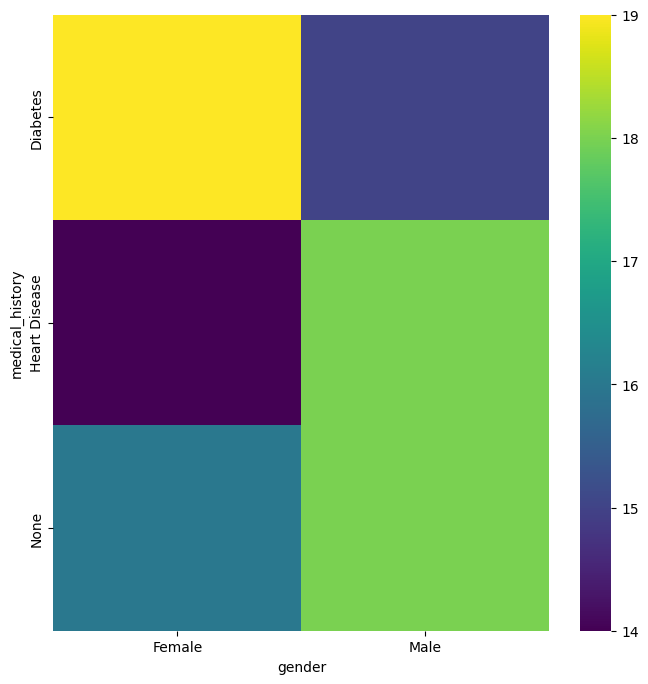

In [22]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['medical_history'].value_counts()
    for x_label, grp in data.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('medical_history')

In [23]:

features = ["age", "gender", "heart_rate", "blood_pressure", "medical_history", "spo2_level", "smoker"]
user_data = np.array(106).reshape(-1, 1)
svm_prediction, lda_prediction = predict_cardiac_arrest(data, features, user_data)
print(features)
print(user_data)

['age', 'gender', 'heart_rate', 'blood_pressure', 'medical_history', 'spo2_level', 'smoker']
[[106]]


In [24]:

print(f"SVM Prediction: Cardiac arrest - {svm_prediction}")
print(f"LDA Prediction: Cardiac arrest - {lda_prediction}")

SVM Prediction: Cardiac arrest - No
LDA Prediction: Cardiac arrest - No


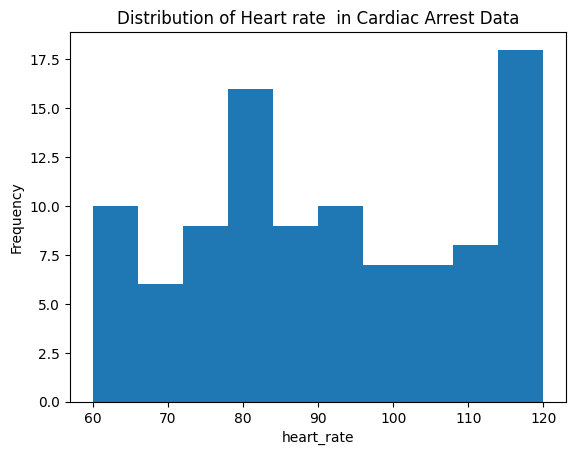

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/cardiac_arrest_1.csv')
blood_pressure = data["heart_rate"]
plt.hist(blood_pressure)
plt.xlabel("heart_rate")
plt.ylabel("Frequency")
plt.title("Distribution of Heart rate  in Cardiac Arrest Data")
plt.show()